Unit 10, Lecture 1
====

*Numerical Methods and Statistics*

----

#### Prof. Andrew White, April 4 2017

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi, erf
import scipy.optimize

Hypothesis Testing
====

**Hypothesis**: Going to college increases your starting salary

It's not really possible to prove this directly. We can, however, disprove the opposite hypothesis. We construct the opposite hypothesis to what we're interested in, called the *null hypothesis*. The null hypothesis is an assumption of no-difference and/or no-correlation.

In our example, this seems simple at first: *Going to college has no effect on your salary*. 

But, maybe the null hypothesis is: *For People who qualified and were accepted to college, attending college has no effect on their salary*. 

Or it might be *People who can afford, are smart enough, and motivated enough to go to college but did not, have the same salary as those that did.*

Let's assume we know well enough what our null hypothesis is. Hypothesis testing is the ability to use statistics to disprove the null hypothesis

Hypothesis Testing
----

We construct a null hypothesis and take it to be true. For example, we believe college has no influence on income. This allows us to build a simple probability model. For colelge then, we might take income to be normally distributed. Then we see how likely our *observed* data is according to that null hypothesis model. For example, we check to see if the sample mean of people who graduated from college matches our null hypothesis mean.

Hypothesis Test Example
----

I open up a cash4gold store and people bring me their jewlery. I know the probability distribution for gold melting is normal with mean 1060 $^{\circ}$C and my measurements have a standard deviation of 3$^{\circ} $C. I melt a sample at 1045 $^{\circ} $ C and want to know if I should be suspicious.

**Null Hypothesis**: The sample is gold

Let's see if I can disporve this. If the sample is gold, what is the probability of that measurement? Zero, because it's a single point. Let's ask though how big of an interval would we need to include that measurement.

In [2]:
from scipy import stats as ss

Z = abs(1045 - 1060.) / 3
interval_p = ss.norm.cdf(Z) - ss.norm.cdf(-Z)

print(interval_p)

0.999999426697


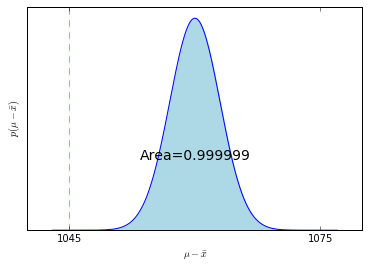

In [16]:
import numpy as np
import matplotlib.pyplot as plt

T = 1045
mu = 1060
w = mu - T
x = np.linspace(mu - w  - 2, w + mu + 2, 1000)
y = ss.norm.pdf(x, loc=mu, scale=3)
plt.plot(x,y)
plt.fill_between(x, y, where= np.abs(x - mu) < w, color='lightblue')
plt.text(mu,np.max(y) / 3, 'Area={}'.format(np.round(interval_p,6)), fontdict={'size':14}, horizontalalignment='center')
plt.axvline(mu - w, linestyle='--', color='orange')
plt.axvline(mu - w, linestyle='--', color='orange')
plt.xticks([mu - w, mu + w], [1045, mu + w])
plt.yticks([])
plt.ylabel(r'$p(\mu - \bar{x})$')
plt.xlabel(r'$\mu - \bar{x}$')
plt.show()

We would expect to see values outside or at the boundary of this interval 0.00000001% of the time.

What is signficiant?
----

Would we call it significant if it was 0.1%? what about 1%? It turns out the convention is 5%. This is called our $\alpha$ or significance level.

We saw in the cash4gold example how to compare a single sample with a known population. What about when we don't know the standard deviation of the population?

I open up a cash4gold store and people bring me their jewlery. I know the probability distribution for gold melting is normal with mean 1060 $^{\circ}$C. I do not know the standard deviation. If I get a sample that melts at 1045$^\circ{}$C, should I be suspicious?

I don't know. We have no way of estimating the standard deviation with one sample, so we can't say anything. If we have at least 3 samples though, we can compute the sample standard deviation

This leads us to the beautiful part about hypothesis testing: since we're assuming the null hypothesis, that the samples are gold, we can substitute the standard deviation we get from the samples into the population.

----

Student's $t$-Test
====

I open up a cash4gold store and people bring me their jewlery. I know the probability distribution for gold melting is normal with mean 1060 $^{\circ}$C. I do not know the standard deviation. Someone brings in 6 samples and they melt at 1035, 1050, 1020, 1055, and 1046 $^{\circ}$C. Should I reject the null hpyothesis, that these are gold?

#### Logical Steps: 

1. Assuming the null hypothesis, compute our uncertainty in the true mean confidence interval
2. We happen to have the true mean, so then we see how big the confidence interval has to be to include it
3. How big our confidence interval is, tells is how likely the underlying null hypothesis is

In [5]:
samples = np.array([1035., 1050., 1020., 1055., 1046.])
sigma = sqrt(np.var(samples, ddof=1))
sample_mean = np.mean(samples)
true_mean = 1060.

print(sigma, sample_mean, true_mean)

T = (sample_mean - true_mean) / (sigma / sqrt(len(samples)))
print(T)

13.9534941860453 1041.2 1060.0
-3.01272766638


Now we have a $T$ and we know $P(T)$. However, just like the $zM$ test, we can't compute $P(T)$ since that's a single point and we're using a continuous distribution. So instead, we build an interval and see how big it must be to catch that $T$. 

Specifically, we want to find $\int_{-T}^T p(t)\,dt$

In [6]:
print('T = ', T)

p = ss.t.cdf(T, len(samples)) # The integral from -infinity to T
print(p, 'Is the single sided p-value')

p = (ss.t.cdf(T, len(samples)) - ss.t.cdf(-T, len(samples))) # The integral from -T to T
print(p, 'Is the double sided p-value')

print('notice, just using 2 * the single-sided value gives the same answer')

T =  -3.01272766638
0.0148313200979 Is the single sided p-value
-0.970337359804 Is the double sided p-value
notice, just using 2 * the single-sided value gives the same answer


What if accidentally reverse our T-value?
---

In [4]:
T = (true_mean - sample_mean) / (sigma / sqrt(len(samples)))
print (T)

p = (scipy.stats.t.cdf(T, len(samples)))
print ('CDF gives: ', p)
print ('Recognize that includes from -infty up to a positive T, so we need to find the complementary area')

print (1 - p, 'Is the single sided p-value')
print ((1 - p) * 2, 'Is the double sided p-value')

3.01272766638
CDF gives:  0.985168679902
Recognize that includes from -infty up to a positive T, so we need to find the complementary area
0.0148313200979 Is the single sided p-value
0.0296626401959 Is the double sided p-value


Summary of Methods for Comparing Single Measurement with Normal Population
====

$zM$ Test
====

**Data Type:** Measurements and Ranks

**Compares:** A sample vs a single normally distributed population

**Null Hypothesis:** The sample came from the population

**Conditions:** Standard deviation of population is known

**Related Test 1:** Student's $t$-test, which is used when the standard deviation is not known

**Python:** Integrate an interval with a Z-statistic and `erf` or `scipt.stats.norm.cdf`

Student's $t$-test
====

**Data Type:** Measurements and Ranks

**Compares:** A sample vs a single normally distributed population

**Null Hypothesis:** The sample came from the population

**Conditions:** Standard deviation of population is not known

**Related Test 1:** $zM$ test, which is used when standard deviation is known

**Python:** Integrate an interval with a T-stastic and `scipt.stats.t.cdf`